In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv("PreprocessedData_ml_latest_small.csv", index_col = 0)

In [ ]:
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#Drop the columns idmdId and tmdbId because we are not making any references to other datasets
df = df.drop(["imdbId", "tmdbId", "timestamp"], 1)
df.head()

/var/folders/8n/hkz58d7n7lx4hm1fztt4m1vc0000gn/T/ipykernel_15834/3161653688.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["imdbId", "tmdbId", "timestamp"], 1)


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
#Extracting the year from the title column and create a new column that contains the release "year"
df["year"] = df['title'].replace(to_replace='[^0-9]', value='', regex=True)
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [6]:
#removing the year and paranthese from the tilte column
df["title"] = df["title"].str.replace("(\(.*?\))", "").str.strip()
df.head()

/var/folders/8n/hkz58d7n7lx4hm1fztt4m1vc0000gn/T/ipykernel_15834/807367596.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"] = df["title"].str.replace("(\(.*?\))", "").str.strip()


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [ ]:
#check if the years are in range
df.year.value_counts()

In [7]:
#We can see, that there are some wrong dates which have more than 4 numeric numbers. 
#We need to clean that.
df["year"] = df['year'].str[-4:]
df.year.info()

<class 'pandas.core.series.Series'>
Int64Index: 100836 entries, 0 to 100835
Series name: year
Non-Null Count   Dtype 
--------------   ----- 
100836 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [11]:
#Converting the "year" column into a float
df["year"] = pd.to_numeric(df['year'])
df.year.head()

0    1995.0
1    1995.0
2    1995.0
3    1995.0
4    1995.0
Name: year, dtype: float64

In [12]:
df["year"].fillna(-1, inplace=True)
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [13]:
df["year"] = df["year"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
 4   genres   100836 non-null  object 
 5   year     100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


Building Graphs

We are going for the collaborative filtering. No target variable. Only needs a rating of the users. No need to keep the tags. 

In [16]:
#Exporting the cleaned dataset
df.to_csv("PreprocessedData_ml_latest_year_small.csv")

In [17]:
test_gre = pd.cut(x = df['year'],
                  bins = [1920, 1960, 1980, 1990, 2000, 2010, 2020], labels = ["before 1960", '1961 - 1980','1981 - 1990', '1991 - 2000', '2001 - 2010', "2011 - 2020"])
test_gre.head()

0    1991 - 2000
1    1991 - 2000
2    1991 - 2000
3    1991 - 2000
4    1991 - 2000
Name: year, dtype: category
Categories (6, object): ['before 1960' < '1961 - 1980' < '1981 - 1990' < '1991 - 2000' < '2001 - 2010' < '2011 - 2020']

/var/folders/8n/hkz58d7n7lx4hm1fztt4m1vc0000gn/T/ipykernel_15834/3238663987.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")


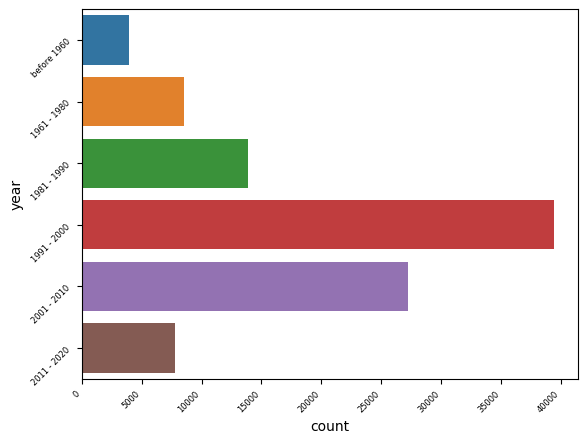

In [18]:
b=sns.countplot(y = test_gre)
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")
b.set_yticklabels(b.get_yticklabels(), rotation=45, ha="right")
b.tick_params(labelsize=6)
plt.show()

/var/folders/8n/hkz58d7n7lx4hm1fztt4m1vc0000gn/T/ipykernel_15834/3083002000.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")


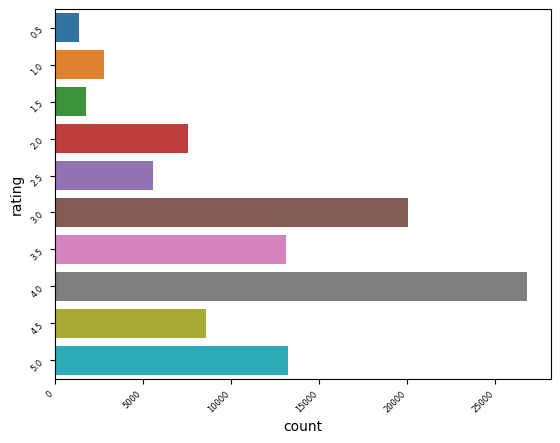

In [19]:
b=sns.countplot(y = df.rating)
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")
b.set_yticklabels(b.get_yticklabels(), rotation=45, ha="right")
b.tick_params(labelsize=6)
plt.show()

In [20]:
df.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64